In [1]:
import data_training as dt
from hipe4ml import plot_utils
import numpy as np

In [2]:
mytraindata,mytraindataMC=dt.get_traindata()
model=dt.define_model()
model.train_test_model(mytraindata, multi_class_opt="ovo")
model.train_test_model(mytraindataMC, multi_class_opt="ovo")

Training xgboost model for classification
Number of detected classes: 3
Training the model: ...
Training the model: Done!
Testing the model: ...
ROC_AUC_score: 0.854502
Testing the model: Done!
Training xgboost model for classification
Number of detected classes: 3
Training the model: ...
Training the model: Done!
Testing the model: ...
ROC_AUC_score: 0.822747
Testing the model: Done!


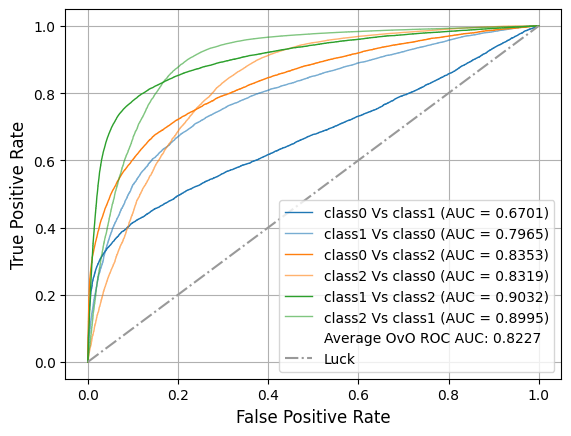

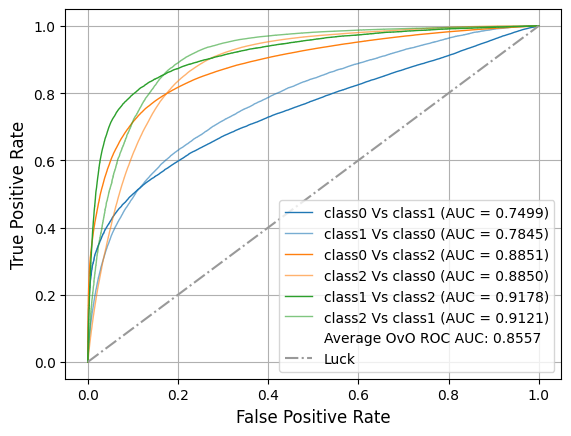

In [3]:
dt.plot_bdt(mytraindata,model,marg=True, save_fig=True,filename="output_old_traintest_databckg.pdf")
dt.plot_bdt(mytraindataMC,model,marg=True, save_fig=True,filename="output_old_traintest_MCbckg.pdf")
dt.plot_roc(mytraindataMC,model, save_fig=True,filename="roc_old_bckgMC.pdf")
dt.plot_roc(mytraindata,model, save_fig=True,filename="roc_old_bckgdata.pdf")